<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/FuzzyLogic/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [12]:
# criar as variáveis linguísticas
crises = ctrl.Antecedent(np.arange(0, 101, 1), 'crises')
saba = ctrl.Antecedent(np.arange(0, 101, 1), 'saba')
debito_expiratorio = ctrl.Antecedent(np.arange(0, 101, 1), 'debito_expiratorio')
gravidade = ctrl.Consequent(np.arange(0, 101, 1), 'gravidade')

In [13]:
# personalizar as variáveis linguísticas pra desenvolver as funções de pertinência
crises.automf(names=['semanal', 'diario', 'continuo'])
saba.automf(names=['semanal', 'diario', 'continuo'])
debito_expiratorio.automf(names=['50-80', '33-55', 'menos_33'])
gravidade.automf(names=['moderada', 'aguda_grave', 'risco_vida'])

In [14]:
# criar as funções de pertinência para cada variável (chamado de universo)
# na função de pertinência precisamos ter uma forma (trapezoidal ou triangular)
# antecedentes vamos criar trapezoidal e consequentes triangular
crises['semanal'] = fuzz.trapmf(crises.universe, [0, 0, 30, 50]) # os valores são definidos pelo especialista
crises['diario'] = fuzz.trapmf(crises.universe, [30, 50, 70, 90])
crises['continuo'] = fuzz.trapmf(crises.universe, [80, 90, 100, 100])

saba['semanal'] = fuzz.trapmf(saba.universe, [0, 0, 20, 40])
saba['diario'] = fuzz.trapmf(saba.universe, [20, 40, 60, 80])
saba['continuo'] = fuzz.trapmf(saba.universe, [80, 90, 100, 100])

debito_expiratorio['50-80'] = fuzz.trapmf(debito_expiratorio.universe, [0, 0, 20, 40])
debito_expiratorio['33-55'] = fuzz.trapmf(debito_expiratorio.universe, [20, 40, 60, 80])
debito_expiratorio['menos_33'] = fuzz.trapmf(debito_expiratorio.universe, [80, 90, 100, 100])

gravidade['moderada'] = fuzz.trimf(gravidade.universe, [0, 30, 60])
gravidade['aguda_grave'] = fuzz.trimf(gravidade.universe, [30, 60, 85])
gravidade['risco_vida'] = fuzz.trimf(gravidade.universe, [90, 100, 100])

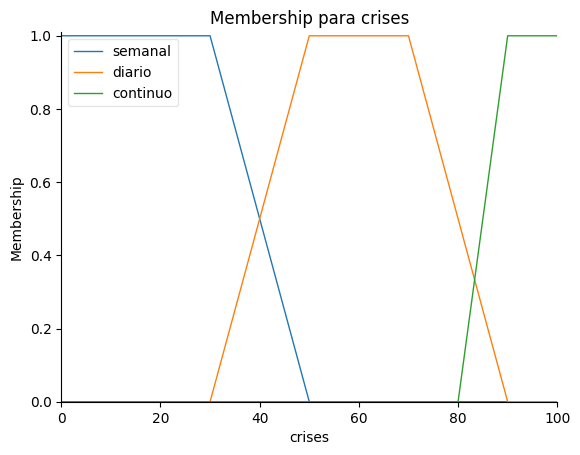

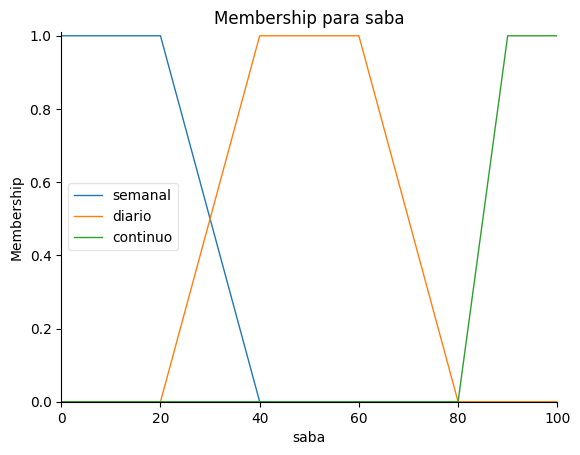

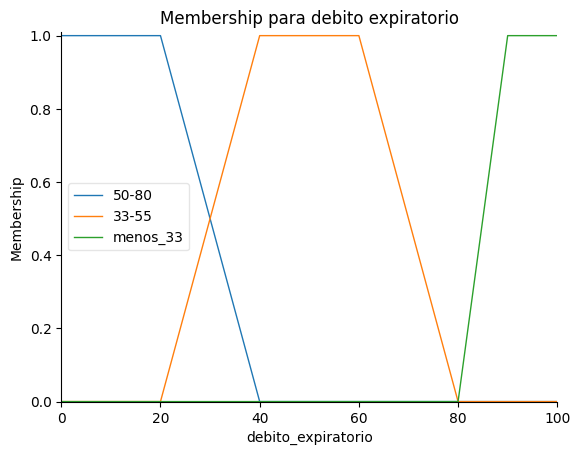

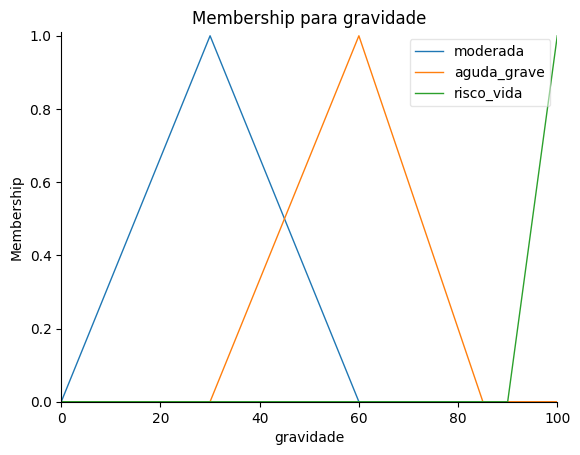

In [15]:
# visualizar as funções de pertinência pra ajudar a compreender o modelo
crises.view()
plt.title('Membership para crises')
plt.show()

saba.view()
plt.title('Membership para saba')
plt.show()

debito_expiratorio.view()
plt.title('Membership para debito expiratorio')
plt.show()

gravidade.view()
plt.title('Membership para gravidade')
plt.show()

In [16]:
# criar as regras
rule1 = ctrl.Rule(crises['semanal'] | saba['semanal'] | debito_expiratorio['50-80'], gravidade['moderada'])
rule2 = ctrl.Rule(crises['diario'] | saba['diario'] | debito_expiratorio['33-55'], gravidade['aguda_grave'])
rule3 = ctrl.Rule(crises['continuo'] | saba['continuo'] | debito_expiratorio['menos_33'], gravidade['risco_vida'])

In [17]:
# criar o controle fuzzy
asthma_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
asthma = ctrl.ControlSystemSimulation(asthma_ctrl)

In [23]:
# passar valores para as variáveis para usar o modelo
asthma.input['crises'] = 95
asthma.input['saba'] = 95
asthma.input['debito_expiratorio'] = 100

# usar o modelo de lógica difusa e cria a inferência
asthma.compute() # compute converte a saída fuzzy em um único valor

resultado_gravidade = asthma.output['gravidade']
print("Gravidade da asma: ",resultado_gravidade)

# ver em termos de variável linguística
if 0 <= resultado_gravidade < 60:
  print("A gravidade da asma é moderada")
elif 60 <= resultado_gravidade < 90:
  print("A gravidade da asma é aguda grave")
else:
  print("A gravidade da asma é alto e apresenta risco de vida")

Gravidade da asma:  96.66666666666663
A gravidade da asma é alto e apresenta risco de vida
